In [ ]:
from google.colab import drive
drive.mount('/content/drive')
folder = ('/content/drive/MyDrive/[Data mining] data5cientists/Tiền xử lí')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format # Làm tròn đến thập phân thứ 2 do dataset origin

In [ ]:
# read data
demographic = pd.read_csv(folder + '/demographic.csv')
province_codes = pd.read_csv(folder + '/province_codes.csv')
origin = pd.read_csv(folder + '/origin.csv')
repayment = pd.read_csv(folder + '/repayment.csv')

In [ ]:
demographic.head()

,LABOUR_CONTRACT_TYPE,NUMBER_OF_DEPENDANTS,PERMANENT_ADDRESS_PROVINCE,INDUSTRY,JOB,COMPANY_ADDRESS_PROVINCE,CONTRACT_NO,WEIGHT,EDUCATION,CUSTOMER_INCOME,CREDITIBILITY,ACCOMMODATION_TYPE,DATE_OF_BIRTH,HEIGHT,WORKING_IN_YEAR,MARITAL_STATUS,INCOME_RESOURCE
0,2.00,2.00,20.00,18.00,9.00,74.00,NaN,60.00,1.00,6056000.00,1.00,0.00,1979.00,155.00,1.00,2.00,5.00
1,4.00,0.00,58.00,18.00,NaN,58.00,569518.00,NaN,2.00,19092000.00,0.00,0.00,1969.00,178.00,2.00,1.00,1.00
2,4.00,0.00,NaN,2.00,NaN,74.00,569723.00,65.00,1.00,1936000.00,2.00,3.00,1964.00,189.00,16.00,4.00,5.00
3,4.00,1.00,46.00,18.00,4.00,NaN,NaN,83.00,2.00,15413000.00,0.00,0.00,NaN,168.00,3.00,2.00,5.00
4,4.00,3.00,NaN,18.00,9.00,NaN,571556.00,74.00,1.00,17533000.00,2.00,NaN,1974.00,172.00,8.00,2.00,5.00


In [ ]:
origin.head()

,DISBURSEMENT_CHANNEL,LIQUIDITY,INSURANCE_COMPANY,INSURANCE_RATE,DISBURSEMENT_DATE,CONTRACT_NO,RATE,HAS_INSURANCE,PRODUCT_CATEGORY,LOAN_TERM,MONTH_INTEREST,LOAN_PURPOSE,BUSINESS_LINE,LOAN_AMOUNT
0,1.00,3.00,0.00,3.75,2023-09,571094.00,3.00,NaN,0.00,36.00,2.00,1.00,NaN,3450000.00
1,2.00,3.00,NaN,3.75,2023-09,569518.00,4.00,YES,1.00,NaN,2.60,3.00,0.00,3060000.00
2,1.00,1.00,0.00,3.75,2023-09,569723.00,NaN,NaN,0.00,NaN,1.70,3.00,0.00,1520000.00
3,1.00,4.00,1.00,3.75,2023-09,569501.00,0.00,YES,1.00,15.00,2.00,3.00,0.00,NaN
4,1.00,4.00,1.00,3.75,2023-09,NaN,2.00,NaN,0.00,NaN,1.70,3.00,0.00,3060000.00


In [ ]:
province_codes.head()

,TỈNH,VÙNG,MÃ TỈNH
0,Hà Nội,Red River Delta,1
1,Hà Giang,NaN,2
2,Cao Bằng,Northern Midland,4
3,Bắc Kạn,NaN,6
4,Tuyên Quang,Northern Midland,8


In [ ]:
repayment.head()

,CONTRACT_NO,SYS_RUN_DATE,TOTAL_EMI_AMOUNT,DUE_DATE_OF_MON,PARTNER_CODE,OUTSTANDING,PRI_PAST_DUE,INT_PAST_DUE,OD_PAST_DUE,OVER_DUE_DAYS_LD,OVER_DUE_DAYS_CLIENT,LAST_PAYMENT_DATE,LAST_PAYMENT_AMOUNT,TOTAL_OVERDUE_PERIOD,MAX_DPD_HISTORY,MONTH_ON_BOOK,CUSTOMER_MAX_DPD_HISTORY
0,765326,2022-06,588.22,NaN,0,2302.17,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,0.00,0.00
1,765326,2022-07,588.22,2022-07-08 00:00:00.000,0,2271.23,0.00,0.00,0.00,0.00,0.00,2022-07-08 00:00:00.000,588.78,0.00,0.00,1.00,0.00
2,765326,2022-08,588.22,2022-08-08 00:00:00.000,0,2240.11,0.00,0.00,0.00,0.00,0.00,2022-08-08 00:00:00.000,585.95,0.00,0.00,2.00,0.00
3,765326,2022-09,588.22,2022-09-08 00:00:00.000,0,2207.31,0.00,0.00,0.00,0.00,0.00,2022-09-12 00:00:00.000,583.10,1.00,2.00,3.00,2.00
4,765326,2022-10,588.22,2022-10-08 00:00:00.000,0,2171.30,0.00,0.00,0.00,0.00,0.00,2022-10-03 00:00:00.000,584.52,1.00,2.00,4.00,2.00


## Clean DataFrame "demographic"

In [ ]:
# Dịch dataset demographic
demographic.rename(columns={'LABOUR_CONTRACT_TYPE': 'Loại hợp đồng', 'DATE_OF_BIRTH': 'Ngày sinh', 'CONTRACT_NO': 'ID hợp đồng',
                            'MARITAL_STATUS': 'Tình trạng hôn nhân', 'EDUCATION': 'Trình độ học vấn', 'JOB': 'Nghề nghiệp',
                            'INDUSTRY': 'Ngành', 'COMPANY_ADDRESS_PROVINCE': 'Địa chỉ công ty (tỉnh thành)', 'PERMANENT_ADDRESS_PROVINCE': 'Địa chỉ thường trú',
                            'WORKING_IN_YEAR': 'Số năm kinh nghiệm', 'NUMBER_OF_DEPENDANTS': 'Số người phụ thuộc', 'CUSTOMER_INCOME': 'Doanh thu',
                            'INCOME_RESOURCE': 'Nguồn doanh thu chính', 'ACCOMMODATION_TYPE': 'Loại hình cư trú', 'WEIGHT': 'Cân nặng', 'HEIGHT': 'Chiều cao',
                            'CREDITIBILITY': 'Tín nhiệm'},
                            inplace=True)

# Check thuộc tính
demographic.columns

Index(['Loại hợp đồng', 'Số người phụ thuộc', 'Địa chỉ thường trú', 'Ngành',
       'Nghề nghiệp', 'Địa chỉ công ty (tỉnh thành)', 'ID hợp đồng',
       'Cân nặng', 'Trình độ học vấn', 'Doanh thu', 'Tín nhiệm',
       'Loại hình cư trú', 'Ngày sinh', 'Chiều cao', 'Số năm kinh nghiệm',
       'Tình trạng hôn nhân', 'Nguồn doanh thu chính'],
      dtype='object')

In [ ]:
demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371200 entries, 0 to 371199
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loại hợp đồng                 293048 non-null  float64
 1   Số người phụ thuộc            307877 non-null  float64
 2   Địa chỉ thường trú            315371 non-null  float64
 3   Ngành                         304094 non-null  float64
 4   Nghề nghiệp                   315548 non-null  float64
 5   Địa chỉ công ty (tỉnh thành)  262358 non-null  float64
 6   ID hợp đồng                   315507 non-null  float64
 7   Cân nặng                      315684 non-null  float64
 8   Trình độ học vấn              308236 non-null  float64
 9   Doanh thu                     315351 non-null  float64
 10  Tín nhiệm                     315533 non-null  float64
 11  Loại hình cư trú              307761 non-null  float64
 12  Ngày sinh                     315328 non-nul

In [ ]:
demographic.describe()

,Loại hợp đồng,Số người phụ thuộc,Địa chỉ thường trú,Ngành,Nghề nghiệp,Địa chỉ công ty (tỉnh thành),ID hợp đồng,Cân nặng,Trình độ học vấn,Doanh thu,Tín nhiệm,Loại hình cư trú,Ngày sinh,Chiều cao,Số năm kinh nghiệm,Tình trạng hôn nhân,Nguồn doanh thu chính
count,293048.00,307877.00,315371.00,304094.00,315548.00,262358.00,315507.00,315684.00,308236.00,315351.00,315533.00,307761.00,315328.00,315411.00,301330.00,307785.00,308138.00
mean,3.83,0.71,55.04,14.27,5.71,54.67,543395.17,74.52,1.89,15801935.54,2.50,1.17,1988.13,164.48,5.68,1.29,3.52
std,0.56,0.95,24.54,6.34,2.88,23.47,151571.49,14.43,1.80,4444601.41,1.71,1.31,9.32,14.43,5.69,1.01,1.93
min,1.00,0.00,1.00,0.00,0.00,1.00,314130.00,50.00,0.00,1000.00,0.00,0.00,1962.00,140.00,0.00,0.00,0.00
25%,4.00,0.00,38.00,8.00,4.00,38.00,420477.50,62.00,1.00,15413000.00,1.00,0.00,1982.00,152.00,2.00,0.00,1.00
50%,4.00,0.00,51.00,18.00,6.00,51.00,517575.00,74.00,1.00,17533000.00,3.00,1.00,1990.00,164.00,4.00,2.00,5.00
75%,4.00,1.00,77.00,18.00,9.00,75.00,614846.50,87.00,2.00,18808000.00,4.00,3.00,1996.00,177.00,8.00,2.00,5.00
max,4.00,30.00,96.00,23.00,9.00,96.00,862727.00,99.00,6.00,19371000.00,5.00,4.00,2004.00,189.00,43.00,4.00,5.00


##Có pattern bất thường trong các thuộc tính sau: `Số người phụ thuộc` có max = 30 (số lượng người phụ thuộc cao bất thường), `Doanh thu` có min = 1000 (có khách hàng chỉ có doanh thu là 1000 VND), `Tín nhiệm` min = 0 (có các trường hợp mà độ tín nhiệm = 0).

In [ ]:
# Kiểm tra giá trị thiếu (%)
demographic.isna().sum() / len(demographic) * 100

,0
Loại hợp đồng,21.05
Số người phụ thuộc,17.06
Địa chỉ thường trú,15.04
Ngành,18.08
Nghề nghiệp,14.99
Địa chỉ công ty (tỉnh thành),29.32
ID hợp đồng,15.00
Cân nặng,14.96
Trình độ học vấn,16.96
Doanh thu,15.05


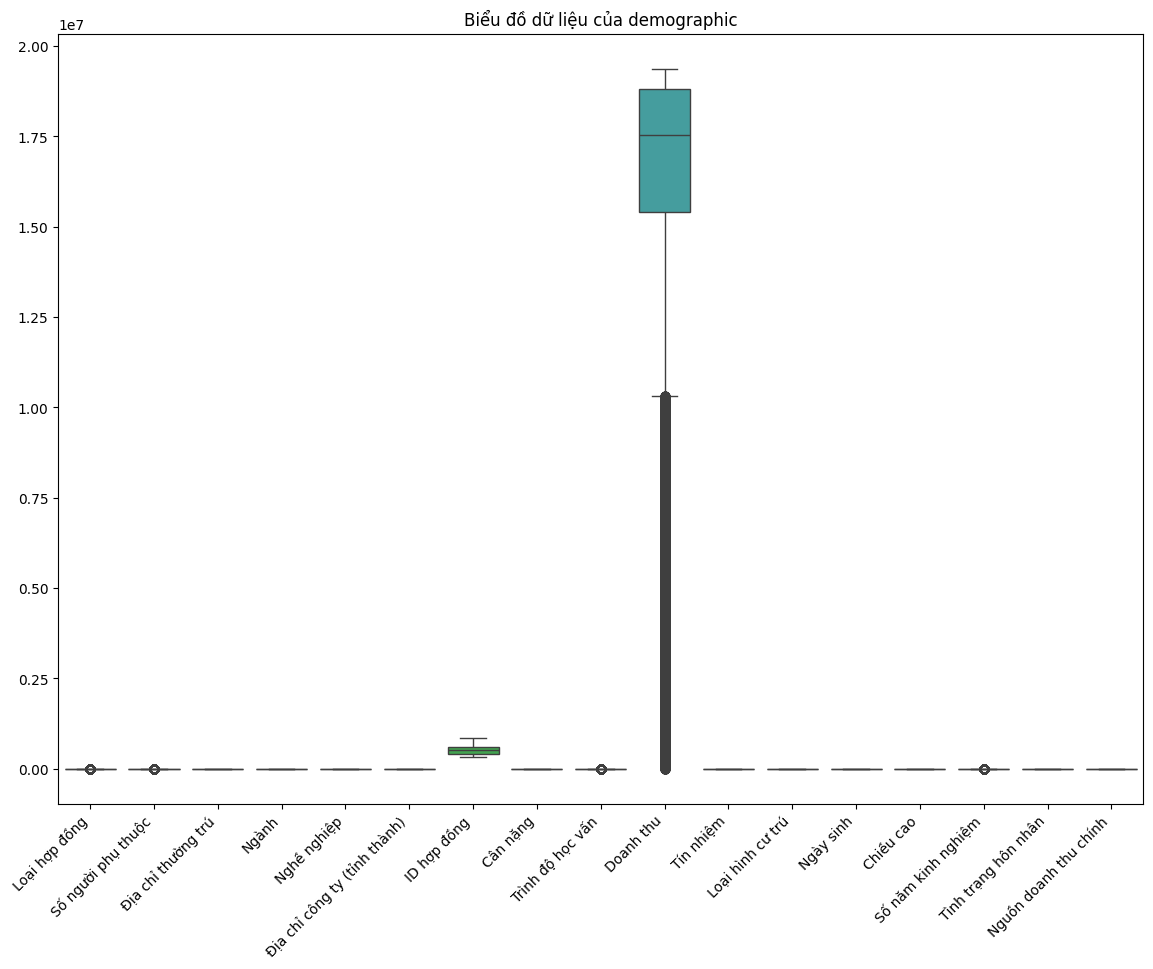

In [ ]:
# Visualise
plt.figure(figsize=(14,10))
sns.boxplot(data=demographic)
plt.xticks(rotation=45, ha='right')
plt.title('Biểu đồ dữ liệu của demographic')
plt.show()

## Biểu đồ cho thấy dữ liệu có các khoảng trùng lặp giống nhau ở 1 số thuộc tính `Loại hợp đồng`, `Số người phụ thuộc`, `ID hợp đồng`, `Trình độ học vấn`, `Số năm kinh nghiệm`; theo logic có thể coi `Loại hợp đồng`, `Trình độ học vấn`, `Số năm kinh nghiệm` bị trùng lặp là khả thi, các biến còn lại nên được kiểm tra chi tiết

#### Kiểm tra thuộc tính: `ID hợp đồng`, `Số người phụ thuộc`, `Địa chỉ thường trú`, `Địa chỉ công ty`, `Tín nhiệm`

In [ ]:
# ID
demographic['ID hợp đồng'].value_counts().values.max()

np.int64(1)

In [ ]:
demographic['ID hợp đồng'].value_counts().values.min()

np.int64(1)

#### Min-Max của `ID` là 1, nghĩa là biến này được xếp vào biến phân loại giá trị [0,1], với 0 là không có hợp đồng và 1 là có hợp đồng, biến này được chọn làm khoá chính (biến mục tiêu)

In [ ]:
# Số người phụ thuộc
demographic['Số người phụ thuộc'].value_counts(normalize=True) * 100

,proportion
Số người phụ thuộc,
0.00,56.73
1.00,20.72
2.00,17.98
3.00,3.99
4.00,0.51
5.00,0.06
6.00,0.01
7.00,0.00
10.00,0.00


#### Phần lớn dữ liệu (99%) có số người phụ thuộc dao động từ 0-3 người.
#### => Có thể coi các giá trị khác là ngoại lại

In [ ]:
cleaned_demographic = demographic[(demographic['Số người phụ thuộc'] <= 3) | demographic['Số người phụ thuộc'].isna()].copy()
cleaned_demographic['Số người phụ thuộc'].value_counts()

,count
Số người phụ thuộc,
0.00,174653
1.00,63783
2.00,55343
3.00,12277


#### Kiểm tra dữ liệu `Địa chỉ công ty` và `Địa chỉ thường trú` có trùng khớp với dữ liệu `Mã tỉnh` của province_codes hay không.

In [ ]:
# Kiểm tra các giá trị trong biến 'Địa chỉ thường trú' có khớp với bên 'Mã tỉnh'
if len(cleaned_demographic[cleaned_demographic['Địa chỉ thường trú'].notna() &
                           (~cleaned_demographic['Địa chỉ thường trú'].isin(province_codes['MÃ TỈNH']))]):
    print('Có giá trị không khớp với mã tỉnh (giá trị khác hoặc độc lập)')
else:
    print('Các giá trị đều khớp với mã tỉnh')


# Kiểm tra các giá trị trong biến 'Địa chỉ công ty' có khớp với bên 'Mã tỉnh'
if len(cleaned_demographic[cleaned_demographic['Địa chỉ công ty (tỉnh thành)'].notna() &
                           (~cleaned_demographic['Địa chỉ công ty (tỉnh thành)'].isin(province_codes['MÃ TỈNH']))]):
    print('Có giá trị không khớp với mã tỉnh (giá trị khác hoặc độc lập)')
else:
    print('Các giá trị đều khớp với mã tỉnh')

Các giá trị đều khớp với mã tỉnh
Các giá trị đều khớp với mã tỉnh


#### Kiểm tra các giá trị của biến `Tín nhiệm`

In [ ]:
cleaned_demographic['Tín nhiệm'].value_counts()

,count
Tín nhiệm,
4.00,52478
5.00,52359
0.00,52334
1.00,52329
3.00,52303
2.00,52194


#### Theo mô tả bộ dữ liệu, `Tín nhiệm` có giá trị trong khoảng 1 tới 5 nên tiến hành loại bỏ giá trị 0

In [ ]:
cleaned_demographic = cleaned_demographic[cleaned_demographic['Tín nhiệm'].isna() | (cleaned_demographic['Tín nhiệm'] > 0)].copy()
cleaned_demographic['Tín nhiệm'].value_counts()

,count
Tín nhiệm,
4.00,52478
5.00,52359
1.00,52329
3.00,52303
2.00,52194


In [ ]:

cleaned_demographic.to_csv(
    "/content/drive/MyDrive/[Data mining] data5cientists/Tiền xử lí/Dữ liệu đã được merged/cleaned_demographic.csv",
    index=False
)





## Clean DataFrame "origin"

In [ ]:
# Dịch dataset origin
origin.rename(columns={'BUSINESS_LINE': 				'Lĩnh vực',
                        'LOAN_PURPOSE': 				'Mục đích vay',
                        'CONTRACT_NO': 				'ID hợp đồng',
                        'PRODUCT_CATEGORY': 		'Hình thức vay',
                        'LOAN_TERM': 				'Điều khoản vay',
                        'MONTH_INTEREST': 			'Lãi suất (tháng)',
                        'LOAN_AMOUNT': 				'Khoản vay (VND)',
                        'DISBURSEMENT_CHANNEL': 		'Kênh thanh toán',
                        'DISBURSEMENT_DATE': 		'Ngày thanh toán',
                        'LIQUIDITY': 				'Mức thanh khoản',
                        'INSURANCE_RATE': 			'Mức bảo hiểm',
                        'RATE': 					'Mức vay',
                        'HAS_INSURANCE': 			'Có bảo hiểm',},
inplace=True)

# Check thuộc tính
origin.columns

Index(['Kênh thanh toán', 'Mức thanh khoản', 'Công ty bảo hiểm',
       'Mức bảo hiểm', 'Ngày thanh toán', 'ID hợp đồng', 'Mức vay',
       'Có bảo hiểm', 'Hình thức vay', 'kì hạn vay', 'Lãi suất (tháng)',
       'Mục đích vay', 'Lĩnh vực', 'Khoản vay (VND)'],
      dtype='object')

In [ ]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371200 entries, 0 to 371199
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Kênh thanh toán   315211 non-null  float64
 1   Mức thanh khoản   315574 non-null  float64
 2   Công ty bảo hiểm  315396 non-null  float64
 3   Mức bảo hiểm      315613 non-null  float64
 4   Ngày thanh toán   315470 non-null  object 
 5   ID hợp đồng       315643 non-null  float64
 6   Mức vay           315635 non-null  float64
 7   Có bảo hiểm       315334 non-null  object 
 8   Hình thức vay     315447 non-null  float64
 9   kì hạn vay        315169 non-null  float64
 10  Lãi suất (tháng)  315292 non-null  float64
 11  Mục đích vay      315973 non-null  float64
 12  Lĩnh vực          315584 non-null  float64
 13  Khoản vay (VND)   315681 non-null  float64
dtypes: float64(12), object(2)
memory usage: 39.6+ MB


In [ ]:
origin.describe()

,Kênh thanh toán,Mức thanh khoản,Công ty bảo hiểm,Mức bảo hiểm,ID hợp đồng,Mức vay,Hình thức vay,kì hạn vay,Lãi suất (tháng),Mục đích vay,Lĩnh vực,Khoản vay (VND)
count,315211.00,315574.00,315396.00,315613.00,315643.00,315635.00,315447.00,315169.00,315292.00,315973.00,315584.00,315681.00
mean,1.22,2.50,0.50,3.31,543463.11,2.50,2.39,24.85,2.01,3.59,0.28,2536650.45
std,0.50,1.71,0.50,0.45,151595.93,1.71,2.78,8.83,0.63,1.58,0.67,1598395.63
min,0.00,0.00,0.00,0.00,314130.00,0.00,0.00,3.00,0.10,0.00,0.00,10000.00
25%,1.00,1.00,0.00,3.00,420559.50,1.00,1.00,18.00,1.60,3.00,0.00,1460000.00
50%,1.00,2.00,1.00,3.50,517680.00,3.00,1.00,24.00,2.20,3.00,0.00,2520000.00
75%,1.00,4.00,1.00,3.75,614872.50,4.00,3.00,36.00,2.50,6.00,0.00,3910000.00
max,4.00,5.00,1.00,3.75,862727.00,5.00,18.00,36.00,3.20,6.00,2.00,6400000.00


####Có pattern bất thường trong các thuộc tính sau: `Mức thanh khoản` có min = 0 (trong mô tả bộ dữ liệu, giá trị thanh khoản chỉ có từ 1-5), `Mức vay` min = 0(có người chọn vay nhưng giá trị vay lại là 0).

In [ ]:
# Kiểm tra giá trị thiếu (%)
origin.isna().sum() / len(origin) * 100

,0
Kênh thanh toán,15.08
Mức thanh khoản,14.99
Công ty bảo hiểm,15.03
Mức bảo hiểm,14.97
Ngày thanh toán,15.01
ID hợp đồng,14.97
Mức vay,14.97
Có bảo hiểm,15.05
Hình thức vay,15.02
kì hạn vay,15.09


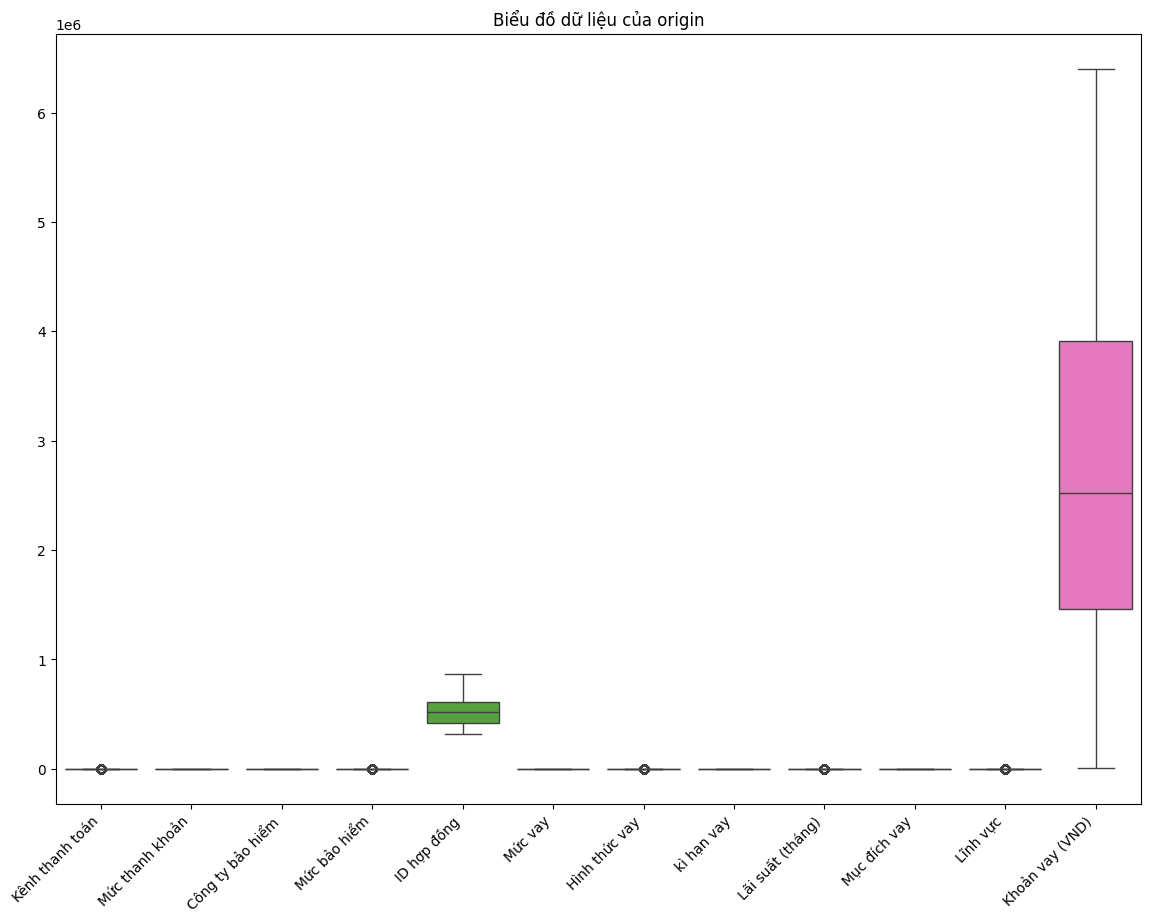

In [ ]:
# Visualise
plt.figure(figsize=(14,10))
sns.boxplot(data=origin)
plt.xticks(rotation=45, ha='right')
plt.title('Biểu đồ dữ liệu của origin')
plt.show()

#### Biểu đồ cho thấy dữ liệu có các khoảng trùng lặp giống nhau ở 1 số thuộc tính: `Kênh thanh toán`, `Mức bảo hiểm` `ID hợp đồng`, `Hình thức vay`, `Lãi suất (tháng)`, `Lĩnh vực`

In [ ]:
# Check ID hợp đồng có giống với giá trị từ demographic hay không
origin['ID hợp đồng'].value_counts().values.max()

np.int64(1)

In [ ]:
origin['ID hợp đồng'].value_counts().values.min()

np.int64(1)

#### Điều này có nghĩa `ID hợp đồng` có cùng giá trị và loại giá trị như bên demographic, biến này sẽ được dùng làm khoá chính để gộp chung với demographic

## 3 biến phân loại gồm `Mục đích vay`, `Mức thanh khoản`, `Mức vay` được xét để xem có biến ngoại lai hay không và giá trị có pattern như thế nào

In [ ]:
# Mục đích vay
origin['Mục đích vay'].value_counts()

,count
Mục đích vay,
3.00,197539
6.00,84587
1.00,32258
2.00,713
0.00,639
5.00,124
4.00,113


## Mục đích vay nhiều nhất là cho mua sắm và phần lớm gồm có:
## 3. Mua sắm
## 6. Phương tiện di chuyển
## 1. Nhà ở

In [ ]:
# Mức thanh khoản
origin['Mức thanh khoản'].value_counts()

,count
Mức thanh khoản,
4.00,52994
2.00,52930
5.00,52720
0.00,52483
1.00,52451
3.00,51996


####`Mức thanh khoản` chỉ có giá trị từ 1-5 nên loại bỏ giá trị 0

In [ ]:
cleaned_origin = origin[(origin['Mức thanh khoản'] > 0) | origin['Mức thanh khoản'].isna()].copy()
cleaned_origin['Mức thanh khoản'].value_counts()

,count
Mức thanh khoản,
4.00,52994
2.00,52930
5.00,52720
1.00,52451
3.00,51996


In [ ]:
# Mức vay
cleaned_origin['Mức vay'].value_counts()

,count
Mức vay,
5.00,45380
3.00,45363
0.00,45190
1.00,45074
4.00,45064
2.00,44812


#### Theo [Điều 8 của Thông Tư 11/2021/TT-NHNN](https://thuvienphapluat.vn/van-ban/Tien-te-Ngan-hang/Thong-tu-11-2021-TT-NHNN-su-dung-du-phong-de-xu-ly-rui-ro-hoat-dong-cua-to-chuc-tin-dung-483459.aspx):
## Tổ chức tín dụng, chi nhánh ngân hàng nước ngoài thực hiện phân loại nợ (trừ các khoản trả thay theo cam kết ngoại bảng) theo 05 nhóm, sử dụng chung cho biến `Mức vay` nên sẽ loại giá trị 0

In [ ]:
cleaned_origin = cleaned_origin[(cleaned_origin['Mức vay'].isna() | (cleaned_origin['Mức vay'] > 0))].copy()
cleaned_origin['Mức vay'].value_counts()

,count
Mức vay,
5.00,45380
3.00,45363
1.00,45074
4.00,45064
2.00,44812


In [ ]:

cleaned_origin.to_csv(
    "/content/drive/MyDrive/[Data mining] data5cientists/Tiền xử lí/Dữ liệu đã được merged/cleaned_origin.csv",
    index=False
)

Gộp demographic và origin

In [ ]:
cleaned_demographic.dropna(subset='ID hợp đồng', inplace=True)
cleaned_origin.dropna(subset='ID hợp đồng', inplace=True)
merged_demographic_origin = cleaned_demographic.merge(right=cleaned_origin, on='ID hợp đồng')
merged_demographic_origin

,Loại hợp đồng,Số người phụ thuộc,Địa chỉ thường trú,Ngành,Nghề nghiệp,Địa chỉ công ty (tỉnh thành),ID hợp đồng,Cân nặng,Trình độ học vấn,Doanh thu,...,Mức bảo hiểm,Ngày thanh toán,Mức vay,Có bảo hiểm,Hình thức vay,kì hạn vay,Lãi suất (tháng),Mục đích vay,Lĩnh vực,Khoản vay (VND)
0,4.00,0.00,NaN,2.00,NaN,74.00,569723.00,65.00,1.00,1936000.00,...,3.75,2023-09,NaN,NaN,0.00,NaN,1.70,3.00,0.00,1520000.00
1,2.00,1.00,96.00,NaN,0.00,75.00,569818.00,85.00,1.00,17533000.00,...,3.75,2023-09,NaN,YES,2.00,NaN,2.00,6.00,0.00,2910000.00
2,2.00,0.00,48.00,18.00,1.00,48.00,569794.00,NaN,1.00,17018000.00,...,3.75,2023-09,4.00,NaN,NaN,NaN,1.70,3.00,0.00,2250000.00
3,NaN,NaN,1.00,NaN,2.00,NaN,858618.00,78.00,NaN,18959000.00,...,3.75,2023-09,5.00,YES,3.00,15.00,3.10,6.00,NaN,510000.00
4,4.00,0.00,48.00,18.00,4.00,48.00,569915.00,67.00,6.00,9747000.00,...,3.75,NaN,5.00,YES,0.00,NaN,1.70,6.00,0.00,4230000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168666,4.00,2.00,27.00,18.00,6.00,27.00,630872.00,52.00,1.00,19183000.00,...,3.75,2023-12,2.00,YES,5.00,36.00,2.10,NaN,NaN,4910000.00
168667,4.00,3.00,54.00,6.00,6.00,54.00,630726.00,NaN,1.00,19183000.00,...,3.75,2023-12,3.00,YES,5.00,36.00,0.60,1.00,2.00,4060000.00
168668,1.00,0.00,84.00,NaN,4.00,79.00,630542.00,66.00,1.00,15413000.00,...,3.75,2023-12,5.00,YES,NaN,24.00,2.90,6.00,2.00,3060000.00
168669,4.00,3.00,75.00,18.00,NaN,75.00,630947.00,82.00,6.00,19262000.00,...,3.75,2023-12,5.00,YES,2.00,36.00,1.70,3.00,2.00,NaN


#### Kiểm định: có khách hàng nào dưới 18 tuổi đã vào thị trường lao động

In [ ]:
# Biến 'Ngày thanh toán' thành giá trị datetime
merged_demographic_origin['Ngày thanh toán'] = pd.to_datetime(arg=merged_demographic_origin['Ngày thanh toán'], format='%Y-%m')

# Tính số tuổi khách hàng
merged_demographic_origin['Tuổi'] = merged_demographic_origin['Ngày thanh toán'].dt.year - merged_demographic_origin['Ngày sinh']

# Loại các khách hàng lớn hơn 18 tuổi
merged_demographic_origin = merged_demographic_origin[
    (merged_demographic_origin['Tuổi'] - merged_demographic_origin['Số năm kinh nghiệm'] >= 18) |
    (merged_demographic_origin['Tuổi'] - merged_demographic_origin['Số năm kinh nghiệm']).isna()].copy()

# Đổi thành giá trị string
merged_demographic_origin['Ngày thanh toán'] = merged_demographic_origin['Ngày thanh toán'].dt.strftime('%Y-%m')

## Có 167,859 khách hàng nhỏ hơn 18 tuổi đã vào thị trường lao động

In [ ]:
merged_demographic_origin

,Loại hợp đồng,Số người phụ thuộc,Địa chỉ thường trú,Ngành,Nghề nghiệp,Địa chỉ công ty (tỉnh thành),ID hợp đồng,Cân nặng,Trình độ học vấn,Doanh thu,...,Ngày thanh toán,Mức vay,Có bảo hiểm,Hình thức vay,kì hạn vay,Lãi suất (tháng),Mục đích vay,Lĩnh vực,Khoản vay (VND),Tuổi
0,4.00,0.00,NaN,2.00,NaN,74.00,569723.00,65.00,1.00,1936000.00,...,2023-09,NaN,NaN,0.00,NaN,1.70,3.00,0.00,1520000.00,59.00
1,2.00,1.00,96.00,NaN,0.00,75.00,569818.00,85.00,1.00,17533000.00,...,2023-09,NaN,YES,2.00,NaN,2.00,6.00,0.00,2910000.00,NaN
2,2.00,0.00,48.00,18.00,1.00,48.00,569794.00,NaN,1.00,17018000.00,...,2023-09,4.00,NaN,NaN,NaN,1.70,3.00,0.00,2250000.00,32.00
3,NaN,NaN,1.00,NaN,2.00,NaN,858618.00,78.00,NaN,18959000.00,...,2023-09,5.00,YES,3.00,15.00,3.10,6.00,NaN,510000.00,28.00
4,4.00,0.00,48.00,18.00,4.00,48.00,569915.00,67.00,6.00,9747000.00,...,NaN,5.00,YES,0.00,NaN,1.70,6.00,0.00,4230000.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168666,4.00,2.00,27.00,18.00,6.00,27.00,630872.00,52.00,1.00,19183000.00,...,2023-12,2.00,YES,5.00,36.00,2.10,NaN,NaN,4910000.00,33.00
168667,4.00,3.00,54.00,6.00,6.00,54.00,630726.00,NaN,1.00,19183000.00,...,2023-12,3.00,YES,5.00,36.00,0.60,1.00,2.00,4060000.00,NaN
168668,1.00,0.00,84.00,NaN,4.00,79.00,630542.00,66.00,1.00,15413000.00,...,2023-12,5.00,YES,NaN,24.00,2.90,6.00,2.00,3060000.00,NaN
168669,4.00,3.00,75.00,18.00,NaN,75.00,630947.00,82.00,6.00,19262000.00,...,2023-12,5.00,YES,2.00,36.00,1.70,3.00,2.00,NaN,47.00


## Phân khúc khách hàng dựa trên doanh thu
## > 5.000.000: Thấp
## > 10.000.000: Trung bình
## > 15.000.000: Trung bình cao
## 15.000.000+: Cao

In [ ]:
merged_demographic_origin['Phân lớp doanh thu'] = pd.cut(
    merged_demographic_origin['Doanh thu'],
    bins=[-np.inf, 5000000, 10000000, 15000000, np.inf],
    labels=['Thấp', 'Trung bình', 'Trung bình cao', 'Cao'],
    right=False
)

merged_demographic_origin['Phân lớp doanh thu'].head()

,Phân lớp doanh thu
0,Thấp
1,Cao
2,Cao
3,Cao
4,Trung bình


## Phân khúc khách hàng dựa trên khoản vay

In [ ]:
merged_demographic_origin['Phân lớp khoản vay'] = pd.cut(
    merged_demographic_origin['kì hạn vay'],
    bins=[-np.inf, 13, 25, np.inf],
    labels=['1-12', '13-24', '25-36'],
    right=False
)

merged_demographic_origin['Phân lớp khoản vay'].head()

,Phân lớp khoản vay
0,NaN
1,NaN
2,NaN
3,13-24
4,NaN


## Phân khúc khách hàng dựa trên nhóm tuổi
### 18 -> 28: Gen Z
### 29 -> 43: Gen Y
### 44+: Gen X

In [ ]:
merged_demographic_origin['Phân lớp tuổi'] = pd.cut(
    merged_demographic_origin['Tuổi'],
    bins=[-np.inf, 29, 44, np.inf],
    labels=['Gen Z', 'Gen Y', 'Gen X'],
    right=False
)

merged_demographic_origin['Phân lớp tuổi'].head()

,Phân lớp tuổi
0,Gen X
1,NaN
2,Gen Y
3,Gen Z
4,NaN


## Gộp file provinces_code và file gộp của demographic và origin

In [ ]:
merged_demographic_origin = merged_demographic_origin.merge(right=province_codes, how='left', left_on='Địa chỉ thường trú', right_on='MÃ TỈNH')
merged_demographic_origin.drop(columns=['Ngày sinh', 'MÃ TỈNH'], inplace=True)

In [ ]:
merged_demographic_origin

,Loại hợp đồng,Số người phụ thuộc,Địa chỉ thường trú,Ngành,Nghề nghiệp,Địa chỉ công ty (tỉnh thành),ID hợp đồng,Cân nặng,Trình độ học vấn,Doanh thu,...,Lãi suất (tháng),Mục đích vay,Lĩnh vực,Khoản vay (VND),Tuổi,Phân lớp doanh thu,Phân lớp khoản vay,Phân lớp tuổi,TỈNH,VÙNG
0,4.00,0.00,NaN,2.00,NaN,74.00,569723.00,65.00,1.00,1936000.00,...,1.70,3.00,0.00,1520000.00,59.00,Thấp,NaN,Gen X,NaN,NaN
1,2.00,1.00,96.00,NaN,0.00,75.00,569818.00,85.00,1.00,17533000.00,...,2.00,6.00,0.00,2910000.00,NaN,Cao,NaN,NaN,Cà Mau,Mekong River Delta
2,2.00,0.00,48.00,18.00,1.00,48.00,569794.00,NaN,1.00,17018000.00,...,1.70,3.00,0.00,2250000.00,32.00,Cao,NaN,Gen Y,Đà Nẵng,Central Coast
3,NaN,NaN,1.00,NaN,2.00,NaN,858618.00,78.00,NaN,18959000.00,...,3.10,6.00,NaN,510000.00,28.00,Cao,13-24,Gen Z,Hà Nội,Red River Delta
4,4.00,0.00,48.00,18.00,4.00,48.00,569915.00,67.00,6.00,9747000.00,...,1.70,6.00,0.00,4230000.00,NaN,Trung bình,NaN,NaN,Đà Nẵng,Central Coast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167854,4.00,2.00,27.00,18.00,6.00,27.00,630872.00,52.00,1.00,19183000.00,...,2.10,NaN,NaN,4910000.00,33.00,Cao,25-36,Gen Y,Bắc Ninh,Red River Delta
167855,4.00,3.00,54.00,6.00,6.00,54.00,630726.00,NaN,1.00,19183000.00,...,0.60,1.00,2.00,4060000.00,NaN,Cao,25-36,NaN,Phú Yên,NaN
167856,1.00,0.00,84.00,NaN,4.00,79.00,630542.00,66.00,1.00,15413000.00,...,2.90,6.00,2.00,3060000.00,NaN,Cao,13-24,NaN,Trà Vinh,NaN
167857,4.00,3.00,75.00,18.00,NaN,75.00,630947.00,82.00,6.00,19262000.00,...,1.70,3.00,2.00,NaN,47.00,Cao,25-36,Gen X,Đồng Nai,Southeast


## Clean DataFrame "repayment"

In [ ]:
# Dịch dataset repayment
repayment.rename(columns={'SYS_RUN_DATE': 'Ngày xuất data', 'TOTAL_EMI_AMOUNT': 'Tổng tiền (tháng)', 'CONTRACT_NO': 'ID hợp đồng',
                            'DUE_DATE_OF_MON': 'Ngày thu tiền (tháng)', 'PARTNER_CODE': 'Mã giao dịch', 'OUTSTANDING': 'Nợ phải trả (VND)',
                            'PRI_PAST_DUE': 'Nợ gốc (VND)', 'INT_PAST_DUE': 'Nợ lãi (%)', 'OD_PAST_DUE': 'Tiền phạt quá hạn (VND)',
                            'OVER_DUE_DAYS_LD': 'Số ngày quá hạn hợp đồng', 'OVER_DUE_DAYS_CLIENT': 'Khách hàng quá hạn (ngày)', 'LAST_PAYMENT_DATE': 'Ngày trả',
                            'LAST_PAYMENT_AMOUNT': 'Khoản trả', 'TOTAL_OVERDUE_PERIOD': 'Trễ hạn (tháng)', 'MAX_DPD_HISTORY': 'Lịch sử quá hạn (hợp đồng)',
                            'MONTH_ON_BOOK': 'Thanh toán (tháng)', 'CUSTOMER_MAX_DPD_HISTORY': 'Lịch sử quá hạn (khách hàng)'},
                            inplace=True)

# Check thuộc tính
repayment.columns

Index(['ID hợp đồng', 'Ngày xuất data', 'Tổng tiền (tháng)',
       'Ngày thu tiền (tháng)', 'Mã giao dịch', 'Nợ phải trả (VND)',
       'Nợ gốc (VND)', 'Nợ lãi (%)', 'Tiền phạt quá hạn (VND)',
       'Số ngày quá hạn hợp đồng', 'Khách hàng quá hạn (ngày)', 'Ngày trả',
       'Khoản trả', 'Trễ hạn (tháng)', 'Lịch sử quá hạn (hợp đồng)',
       'Thanh toán (tháng)', 'Lịch sử quá hạn (khách hàng)'],
      dtype='object')

In [ ]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546558 entries, 0 to 1546557
Data columns (total 17 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   ID hợp đồng                   1546558 non-null  int64  
 1   Ngày xuất data                1546558 non-null  object 
 2   Tổng tiền (tháng)             1544819 non-null  float64
 3   Ngày thu tiền (tháng)         1307773 non-null  object 
 4   Mã giao dịch                  1546558 non-null  int64  
 5   Nợ phải trả (VND)             1546558 non-null  float64
 6   Nợ gốc (VND)                  1546558 non-null  float64
 7   Nợ lãi (%)                    1546558 non-null  float64
 8   Tiền phạt quá hạn (VND)       1546558 non-null  float64
 9   Số ngày quá hạn hợp đồng      1546558 non-null  float64
 10  Khách hàng quá hạn (ngày)     1546558 non-null  float64
 11  Ngày trả                      1405299 non-null  object 
 12  Khoản trả                   

In [ ]:
repayment.describe()

,ID hợp đồng,Tổng tiền (tháng),Mã giao dịch,Nợ phải trả (VND),Nợ gốc (VND),Nợ lãi (%),Tiền phạt quá hạn (VND),Số ngày quá hạn hợp đồng,Khách hàng quá hạn (ngày),Khoản trả,Trễ hạn (tháng),Lịch sử quá hạn (hợp đồng),Thanh toán (tháng),Lịch sử quá hạn (khách hàng)
count,1546558.00,1544819.00,1546558.00,1546558.00,1546558.00,1546558.00,1546558.00,1546558.00,1546558.00,1405252.00,1427592.00,1427592.00,1546558.00,1441281.00
mean,491205.87,787.94,0.19,2887.02,359.42,270.79,110.26,31.53,31.81,709.38,2.20,35.59,6.00,35.62
std,150573.22,150.35,0.45,767.12,779.95,507.82,284.19,68.88,69.23,300.03,3.04,70.86,3.74,70.92
min,340732.00,115.47,0.00,28.40,0.00,0.00,0.00,0.00,0.00,0.58,0.00,0.00,0.00,0.00
25%,392047.00,688.23,0.00,2369.66,0.00,0.00,0.00,0.00,0.00,637.44,0.00,0.00,3.00,0.00
50%,435969.50,763.54,0.00,2849.68,0.00,0.00,0.00,0.00,0.00,750.56,1.00,1.00,6.00,1.00
75%,478706.00,878.64,0.00,3271.09,444.22,399.49,0.00,13.00,13.00,871.59,4.00,27.00,9.00,26.00
max,856761.00,1677.10,4.00,5773.50,5759.34,2794.79,2993.37,365.00,385.00,5175.94,13.00,365.00,12.00,385.00


## Lần này, giá trị min-max của `ID hợp đồng` có khác nhưng vẫn có chung pattern, vẫn dùng để gộp với các data khác

In [ ]:
repayment['ID hợp đồng'].value_counts().values.max()

np.int64(13)

In [ ]:
repayment['ID hợp đồng'].value_counts().values.min()

np.int64(13)

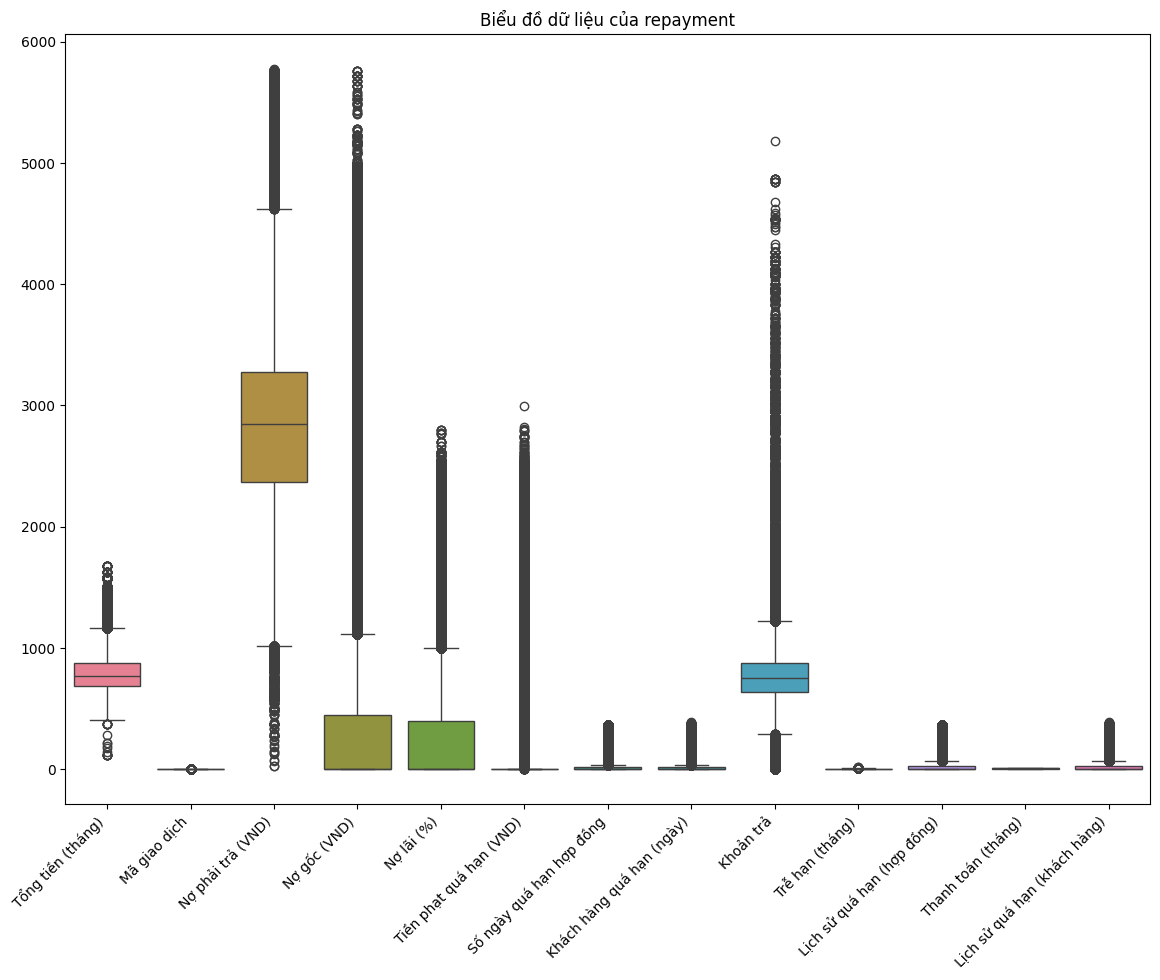

In [ ]:
# Visualise
plt.figure(figsize=(14,10))
sns.boxplot(data=repayment.drop(columns=['ID hợp đồng']))
plt.xticks(rotation=45, ha='right')
plt.title('Biểu đồ dữ liệu của repayment')
plt.show()

#### Từ Bảng và boxplot, có 3 biến `Khách hàng quá hạn` có max = 385 (đây là biến tính theo ngày/năm, với max là 365), `Trễ hạn (tháng)` có max = 13 (biến tính theo tháng/năm với max là 12), `Lịch sử quá hạn (khách hàng)` có max = 385 (tương tự với `Khách hàng quá hạn`), đây sẽ được coi là nhiễu

In [ ]:
# Loại nhiễu
print(f"Trước: {len(repayment)}")
outlier_condition = (
    (repayment['Khách hàng quá hạn (ngày)'] > 365) |
    (repayment['Trễ hạn (tháng)'] == 13) |
    (repayment['Lịch sử quá hạn (khách hàng)'] > 365)
)

repayment = repayment[~outlier_condition].copy()

print(f"Sau: {len(repayment)}")

Trước: 1546558
Sau: 1546540


#### Có 18 dữ liệu nhiễu, chiếm 0.001%, quyết định là loại bỏ các giá trị này

## Phân nhóm các hợp đồng quá hạn theo số ngày

In [ ]:
repayment['Nhóm quá hạn'] = pd.cut(
    repayment['Số ngày quá hạn hợp đồng'],
    bins=[-1, 0, 9, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, np.inf],
    labels=['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14'],
    right=True
)

repayment['Nhóm quá hạn'].head(n = 20)

,Nhóm quá hạn
0,B0
1,B0
2,B0
3,B0
4,B0
5,B0
6,B0
7,B0
8,B0
9,B0


## Gộp dataset

In [ ]:
merged_origin_repayment = cleaned_origin.merge(right=repayment, on='ID hợp đồng')



merged_origin_repayment

,Kênh thanh toán,Mức thanh khoản,Công ty bảo hiểm,Mức bảo hiểm,Ngày thanh toán,ID hợp đồng,Mức vay,Có bảo hiểm,Hình thức vay,kì hạn vay,...,Tiền phạt quá hạn (VND),Số ngày quá hạn hợp đồng,Khách hàng quá hạn (ngày),Ngày trả,Khoản trả,Trễ hạn (tháng),Lịch sử quá hạn (hợp đồng),Thanh toán (tháng),Lịch sử quá hạn (khách hàng),Nhóm quá hạn
0,NaN,5.00,0.00,3.00,2022-06,765326.00,2.00,YES,6.00,24.00,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,0.00,0.00,B0
1,NaN,5.00,0.00,3.00,2022-06,765326.00,2.00,YES,6.00,24.00,...,0.00,0.00,0.00,2022-07-08 00:00:00.000,588.78,0.00,0.00,1.00,0.00,B0
2,NaN,5.00,0.00,3.00,2022-06,765326.00,2.00,YES,6.00,24.00,...,0.00,0.00,0.00,2022-08-08 00:00:00.000,585.95,0.00,0.00,2.00,0.00,B0
3,NaN,5.00,0.00,3.00,2022-06,765326.00,2.00,YES,6.00,24.00,...,0.00,0.00,0.00,2022-09-12 00:00:00.000,583.10,1.00,2.00,3.00,2.00,B0
4,NaN,5.00,0.00,3.00,2022-06,765326.00,2.00,YES,6.00,24.00,...,0.00,0.00,0.00,2022-10-03 00:00:00.000,584.52,1.00,2.00,4.00,2.00,B0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967537,4.00,NaN,NaN,0.75,NaN,854538.00,1.00,YES,12.00,6.00,...,0.00,133.00,133.00,2022-12-19 00:00:00.000,753.66,4.00,133.00,8.00,133.00,B6
967538,4.00,NaN,NaN,0.75,NaN,854538.00,1.00,YES,12.00,6.00,...,0.00,163.00,163.00,2022-12-19 00:00:00.000,753.66,4.00,163.00,9.00,163.00,B7
967539,4.00,NaN,NaN,0.75,NaN,854538.00,1.00,YES,12.00,6.00,...,0.00,194.00,194.00,2022-12-19 00:00:00.000,753.66,4.00,194.00,10.00,194.00,B8
967540,4.00,NaN,NaN,0.75,NaN,854538.00,1.00,YES,12.00,6.00,...,0.00,225.00,225.00,2022-12-19 00:00:00.000,753.66,4.00,225.00,11.00,225.00,B9


In [ ]:
merged_all = merged_demographic_origin.merge(right=repayment, on='ID hợp đồng')
merged_all

,Loại hợp đồng,Số người phụ thuộc,Địa chỉ thường trú,Ngành,Nghề nghiệp,Địa chỉ công ty (tỉnh thành),ID hợp đồng,Cân nặng,Trình độ học vấn,Doanh thu,...,Tiền phạt quá hạn (VND),Số ngày quá hạn hợp đồng,Khách hàng quá hạn (ngày),Ngày trả,Khoản trả,Trễ hạn (tháng),Lịch sử quá hạn (hợp đồng),Thanh toán (tháng),Lịch sử quá hạn (khách hàng),Nhóm quá hạn
0,4.00,1.00,35.00,18.00,NaN,NaN,765326.00,87.00,NaN,12264000.00,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,0.00,0.00,B0
1,4.00,1.00,35.00,18.00,NaN,NaN,765326.00,87.00,NaN,12264000.00,...,0.00,0.00,0.00,2022-07-08 00:00:00.000,588.78,0.00,0.00,1.00,0.00,B0
2,4.00,1.00,35.00,18.00,NaN,NaN,765326.00,87.00,NaN,12264000.00,...,0.00,0.00,0.00,2022-08-08 00:00:00.000,585.95,0.00,0.00,2.00,0.00,B0
3,4.00,1.00,35.00,18.00,NaN,NaN,765326.00,87.00,NaN,12264000.00,...,0.00,0.00,0.00,2022-09-12 00:00:00.000,583.10,1.00,2.00,3.00,2.00,B0
4,4.00,1.00,35.00,18.00,NaN,NaN,765326.00,87.00,NaN,12264000.00,...,0.00,0.00,0.00,2022-10-03 00:00:00.000,584.52,1.00,2.00,4.00,2.00,B0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697165,4.00,0.00,51.00,18.00,NaN,NaN,779206.00,79.00,1.00,15413000.00,...,419.70,133.00,133.00,2023-05-22 00:00:00.000,18.26,6.00,133.00,8.00,133.00,B6
697166,4.00,0.00,51.00,18.00,NaN,NaN,779206.00,79.00,1.00,15413000.00,...,514.91,164.00,164.00,2023-05-22 00:00:00.000,18.26,7.00,164.00,9.00,164.00,B7
697167,4.00,0.00,51.00,18.00,NaN,NaN,779206.00,79.00,1.00,15413000.00,...,615.07,195.00,195.00,2023-05-22 00:00:00.000,18.26,8.00,195.00,10.00,195.00,B8
697168,4.00,0.00,51.00,18.00,NaN,NaN,779206.00,79.00,1.00,15413000.00,...,742.28,225.00,225.00,2023-05-22 00:00:00.000,18.26,9.00,225.00,11.00,225.00,B9


In [ ]:
# Xuất file
merged_all.to_csv(
    "/content/drive/MyDrive/[Data mining] data5cientists/Tiền xử lí/Dữ liệu đã được merged/merged_all.csv",
    index=False
)

merged_origin_repayment.to_csv("/content/drive/MyDrive/[Data mining] data5cientists/Tiền xử lí/Dữ liệu đã được merged/merged_origin_repayment.csv", index=False)
